<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [3]:
eps = 1e-8
math.sqrt(4 + eps)

2.0000000024999998

In [4]:
def func(x1, x2):
  return 0.1*x1**2 + 2* x2**2

In [5]:
def grad_func_x1(x1):
  return 0.2*x1

In [6]:
def grad_func_x2(x2):
  return 4*x2

#PID Optimizer

In [7]:
def PID_Otimizer(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 #parameters
  gamma = 0.9	

  log = [] # lists to store learning process

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  t=0

  while(1):
    t=t+1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    mt_x1 = gamma*prev_mt_x1 + lr*grad_x1
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1
    prev_grad_x1 = grad_x1

    mt_x2 = gamma*prev_mt_x2 + lr*grad_x2
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2
    prev_grad_x2 = grad_x2

    log.append((x1,x2))

    x1_prev = x1
    x2_prev = x2

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1_prev == x1 and x2_prev == x2):
      break

  return x1, x2, log

In [8]:
x1, x2, log1 = PID_Otimizer(lr=0.01, Kd=4) #Tried with Kd=2,3,4 problem after Kd>=5 and Kd<0.8
x1, x2, log2 = PID_Otimizer(lr=0.01, Kd=3)
x1, x2, log3 = PID_Otimizer(lr=0.01, Kd=2)
x1, x2, log4 = PID_Otimizer(lr=0.01, Kd=1)
x1, x2, log5 = PID_Otimizer(lr=0.01, Kd=0.9)
x1, x2, log6 = PID_Otimizer(lr=0.01, Kd=0.8)
#x1, x2, log7 = PID_Otimizer(lr=0.01, Kd=0.7)

#Adaptive Learning rate with PID--1.Adagrad

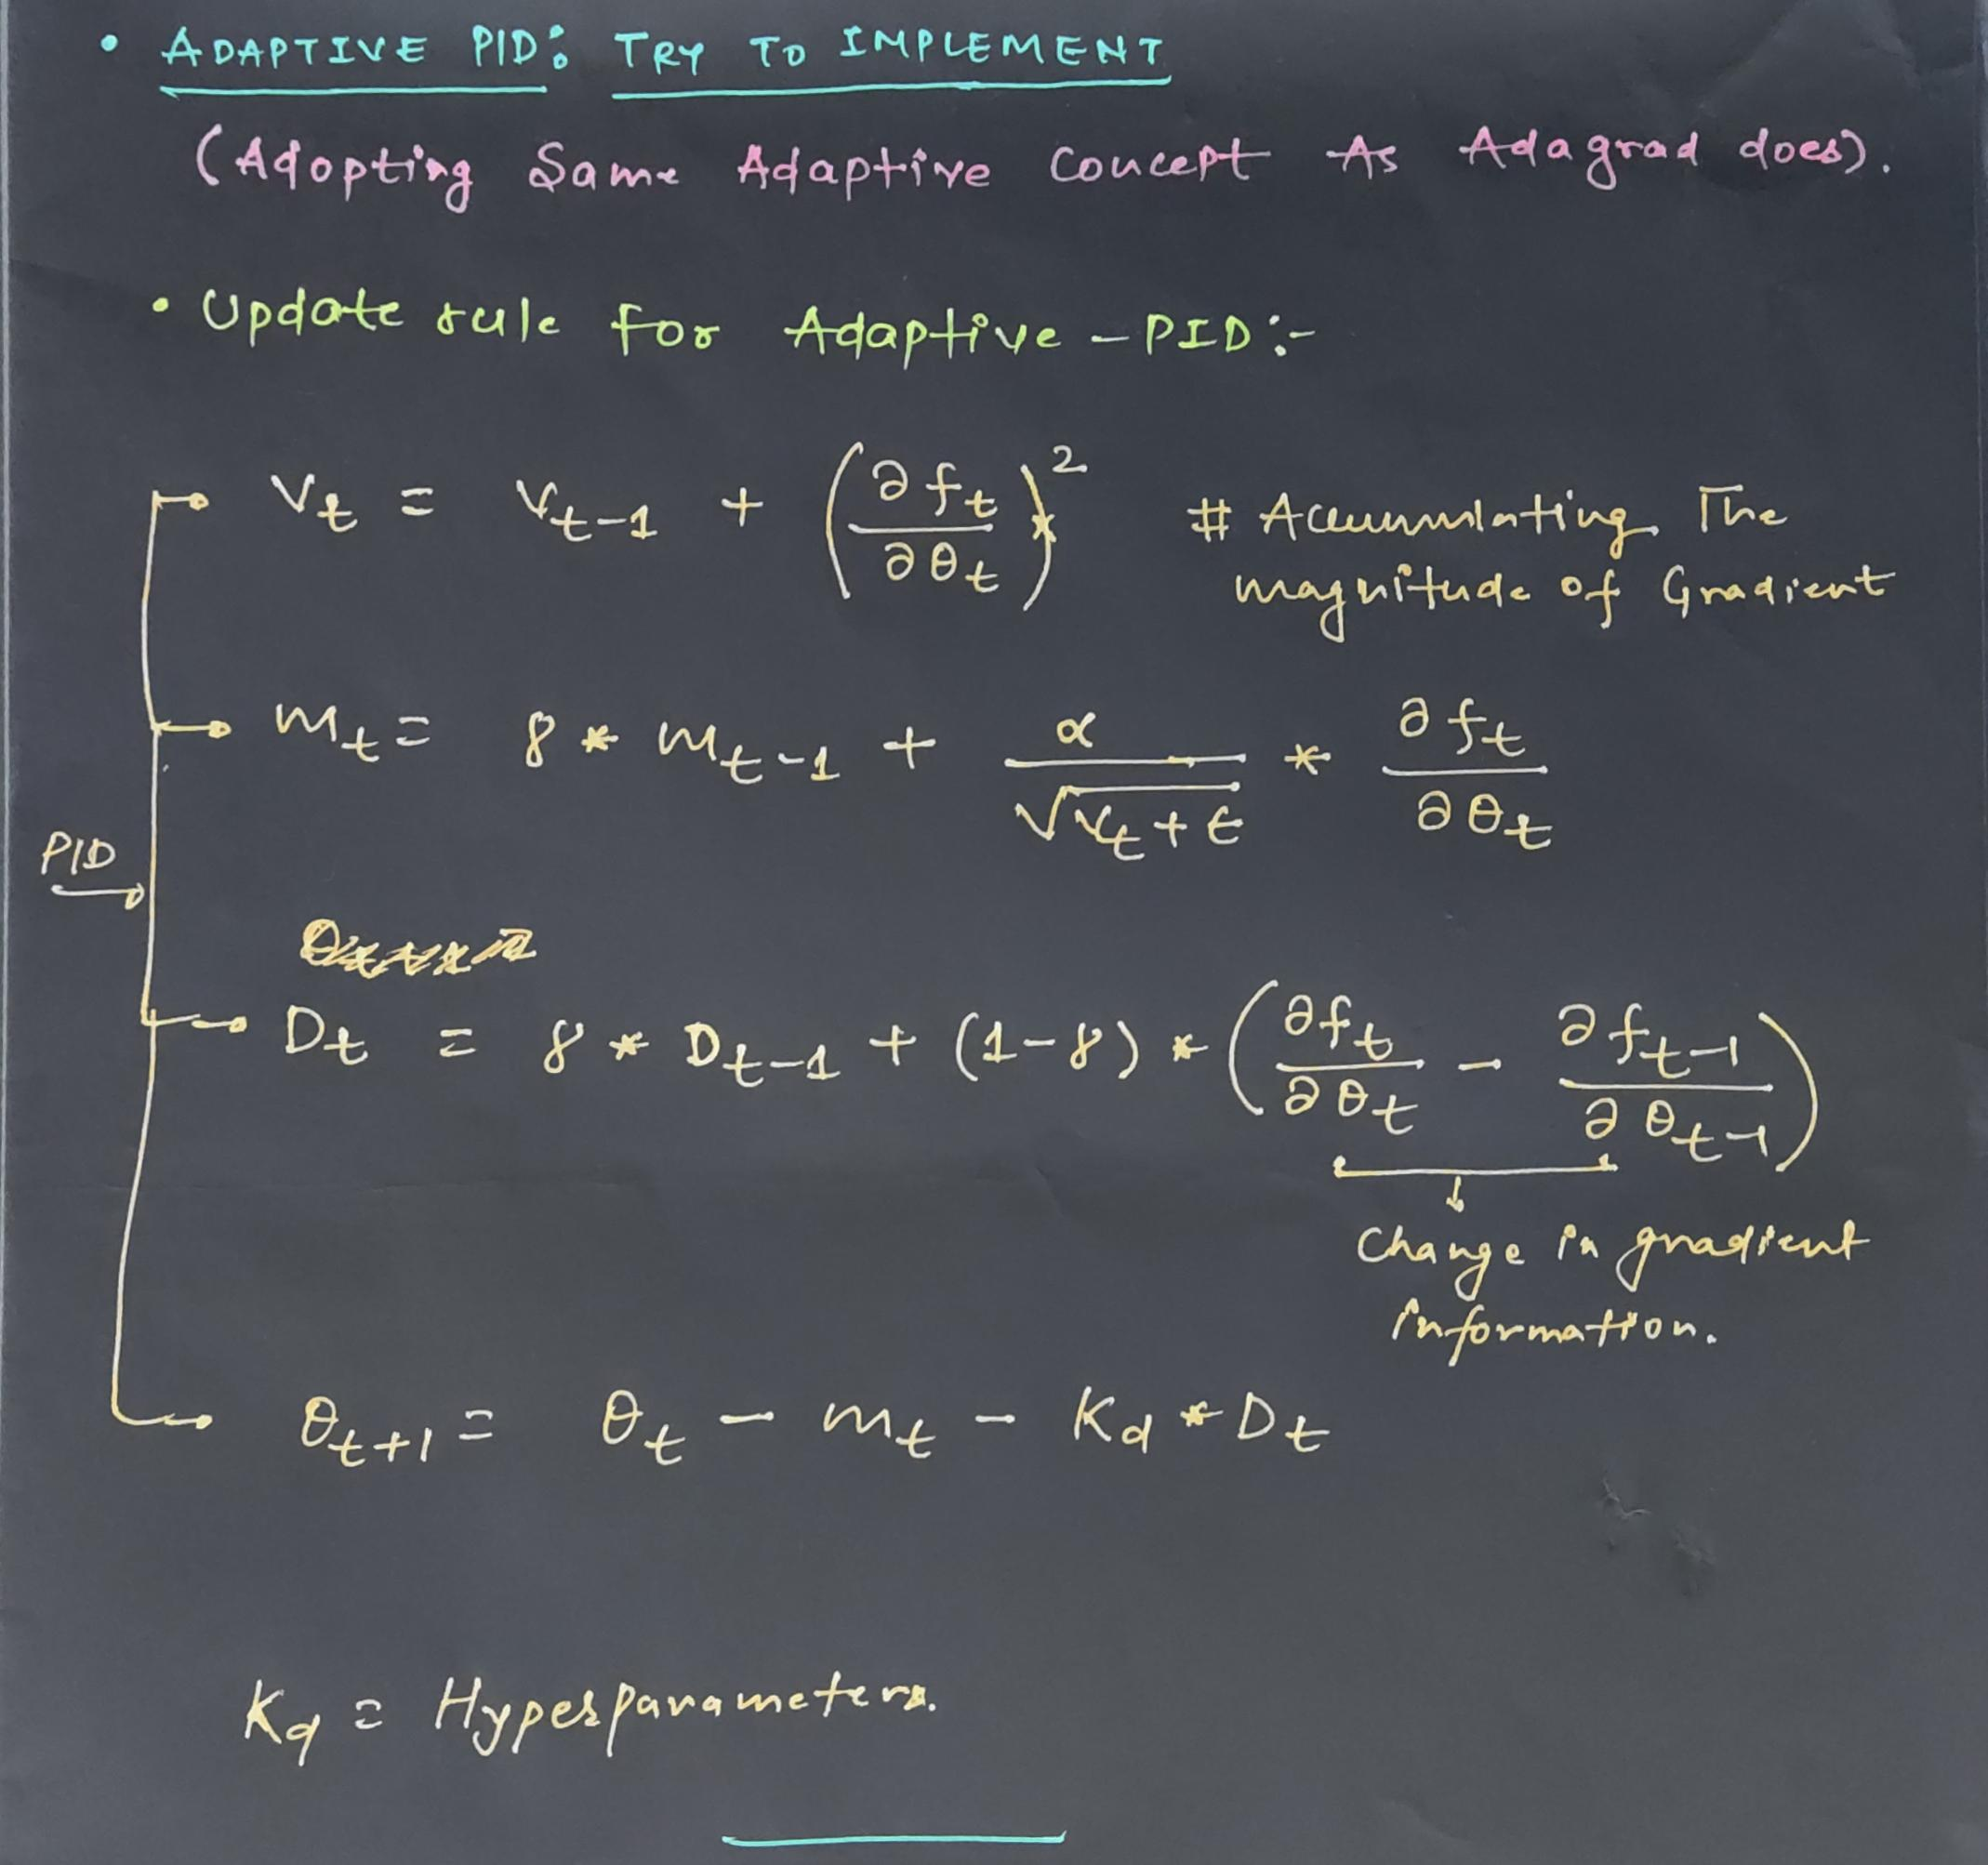


*   Taking bigger steps in which we are repeatedly moving.
*   Learning rate is decided here based on the magnitude of the gradient.



In [9]:
def Adaptive_PID_Ada(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1*grad_x1  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2*grad_x2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

In [10]:
x1, x2, log_1 = Adaptive_PID_Ada(lr=0.01, Kd=4) #Kd = 4
x1, x2, log_2 = Adaptive_PID_Ada(lr=0.01, Kd=3) #Kd = 3
x1, x2, log_3 = Adaptive_PID_Ada(lr=0.01, Kd=2) #Kd = 2
x1, x2, log_4 = Adaptive_PID_Ada(lr=0.01, Kd=1) #Kd = 1
x1, x2, log_5 = Adaptive_PID_Ada(lr=0.01, Kd=0.9) #Kd = 0.9
x1, x2, log_6 = Adaptive_PID_Ada(lr=0.01, Kd=0.8) #Kd = 0.8
#x1, x2, log_7 = Adaptive_PID_Ada(lr=0.01, Kd=5) #Kd = 5    #Not Converging

#Comparision Between PID and Adaptive PID--Ada

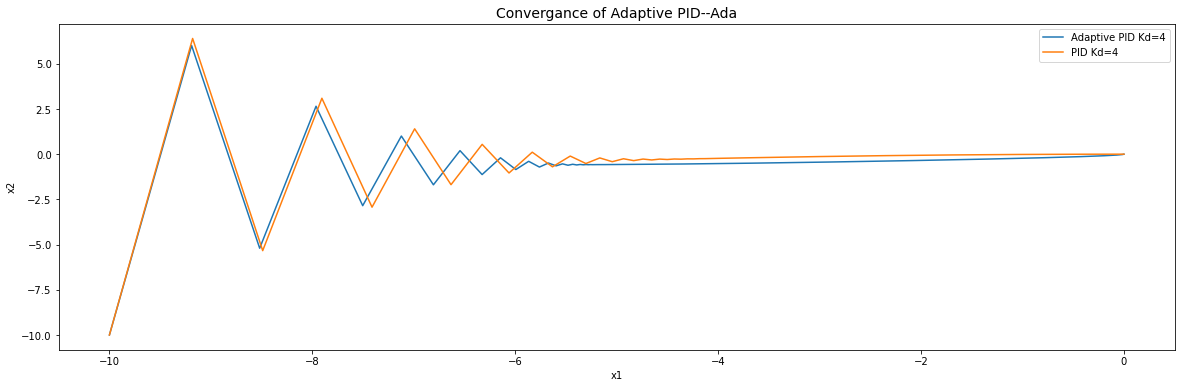

CPU times: user 4.06 s, sys: 73.8 ms, total: 4.13 s
Wall time: 4.15 s


In [11]:
%%time
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]

x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adaptive PID--Ada', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_1,y_val_1, label='Adaptive PID Kd=4')
plt.plot(x_val,y_val, label='PID Kd=4')
plt.legend()

plt.show()

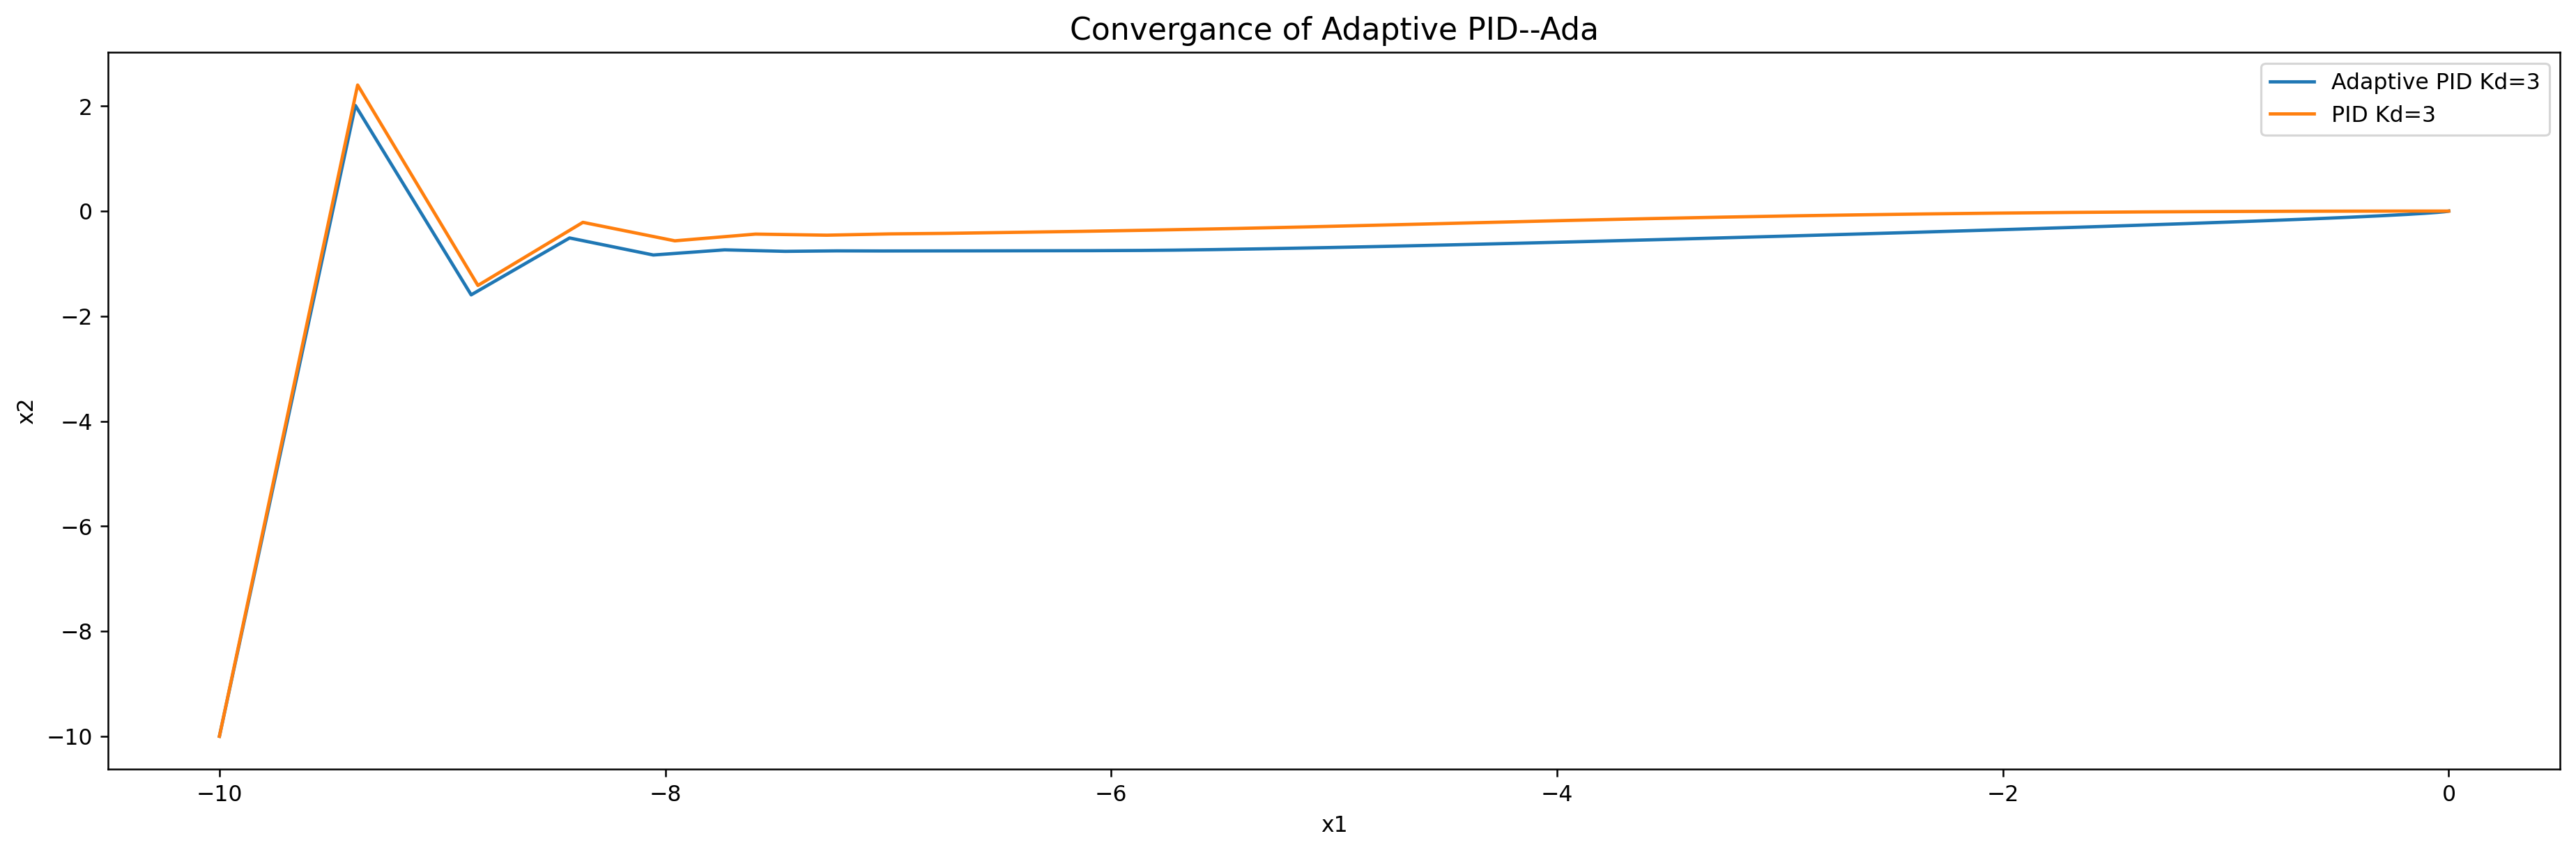

CPU times: user 3.6 s, sys: 51.6 ms, total: 3.65 s
Wall time: 3.67 s


In [12]:
%%time
x_val_2 = [l[0] for l in log_2]
y_val_2 = [l[1] for l in log_2]

x_val = [l[0] for l in log2]
y_val = [l[1] for l in log2]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adaptive PID--Ada', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_2,y_val_2, label='Adaptive PID Kd=3')
plt.plot(x_val,y_val, label='PID Kd=3')
plt.legend()

plt.show()

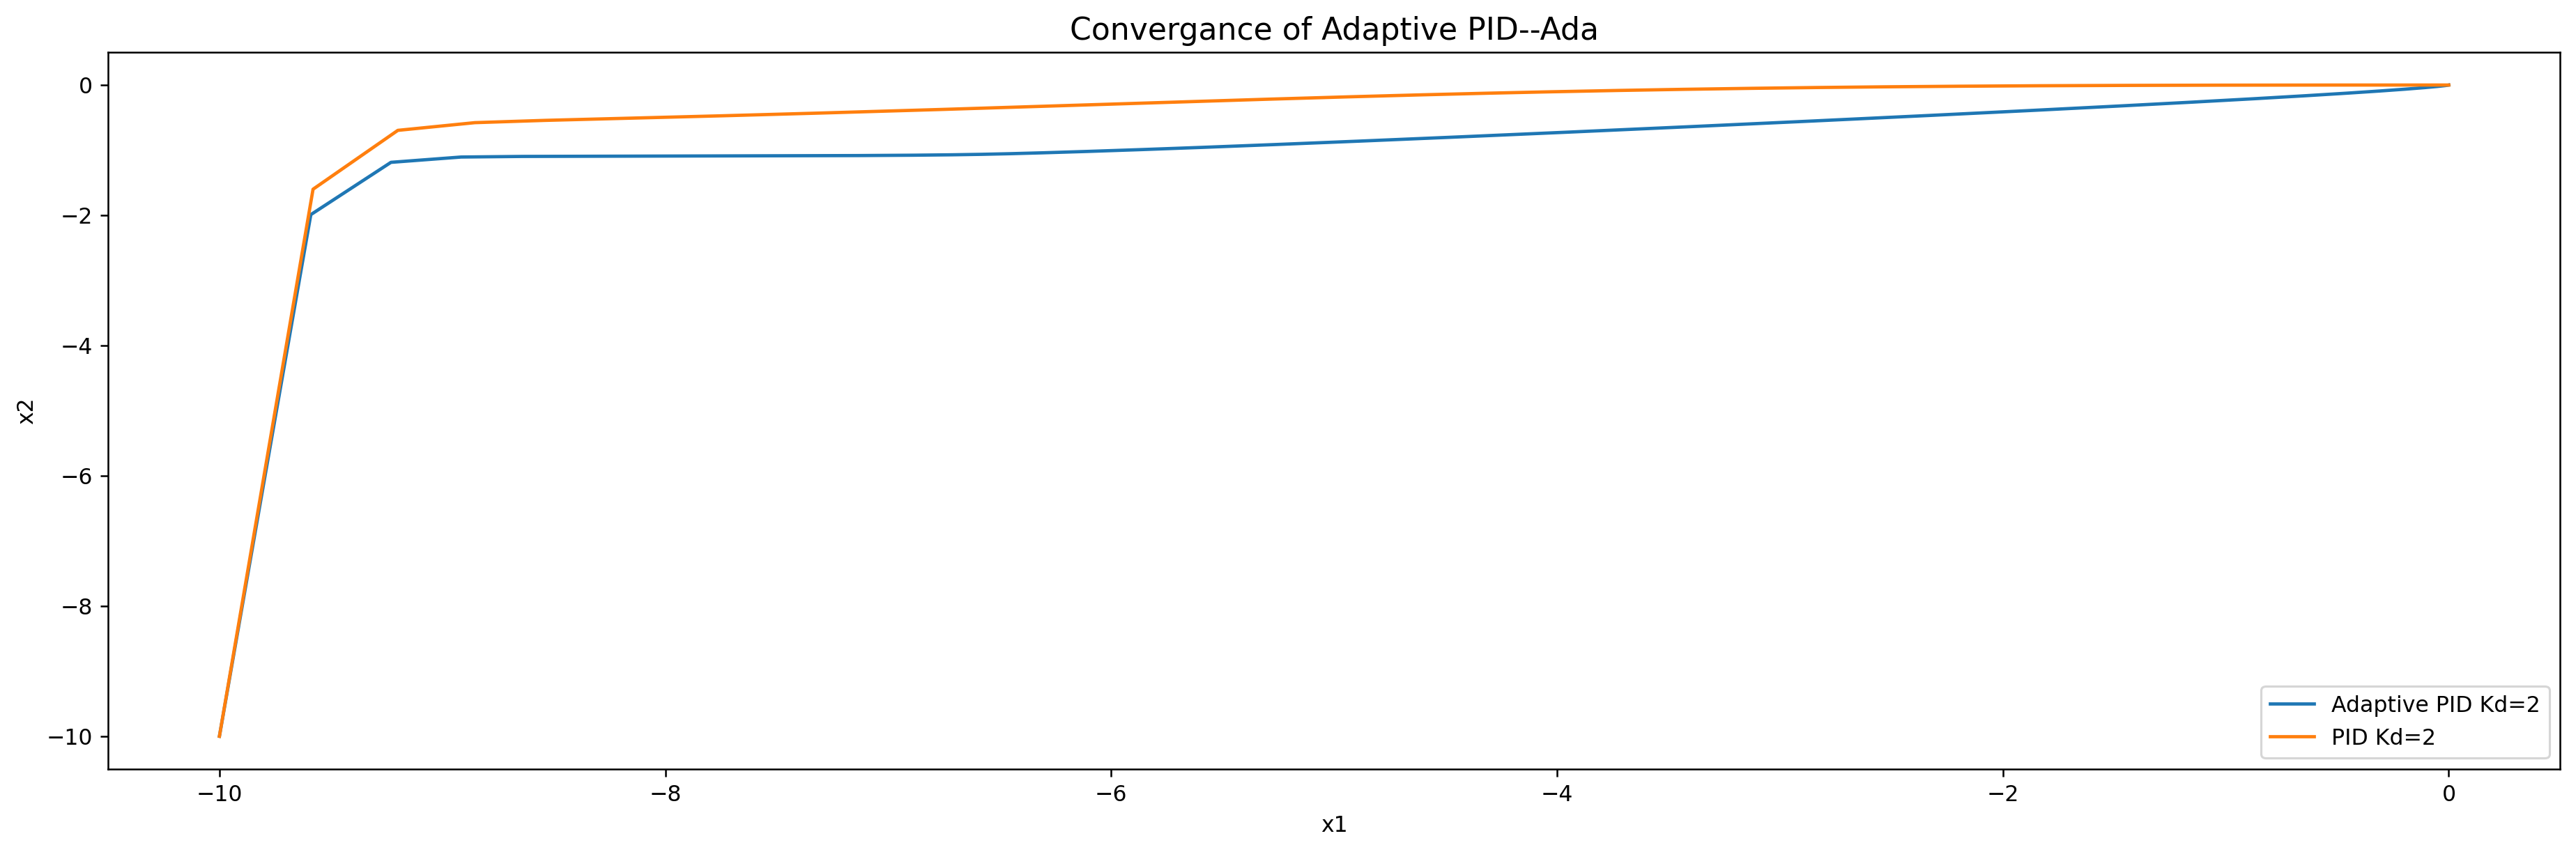

CPU times: user 5.17 s, sys: 65.6 ms, total: 5.23 s
Wall time: 5.27 s


In [13]:
%%time
x_val_3 = [l[0] for l in log_3]
y_val_3 = [l[1] for l in log_3]

x_val = [l[0] for l in log3]
y_val = [l[1] for l in log3]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adaptive PID--Ada', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_3,y_val_3, label='Adaptive PID Kd=2')
plt.plot(x_val,y_val, label='PID Kd=2')
plt.legend()

plt.show()

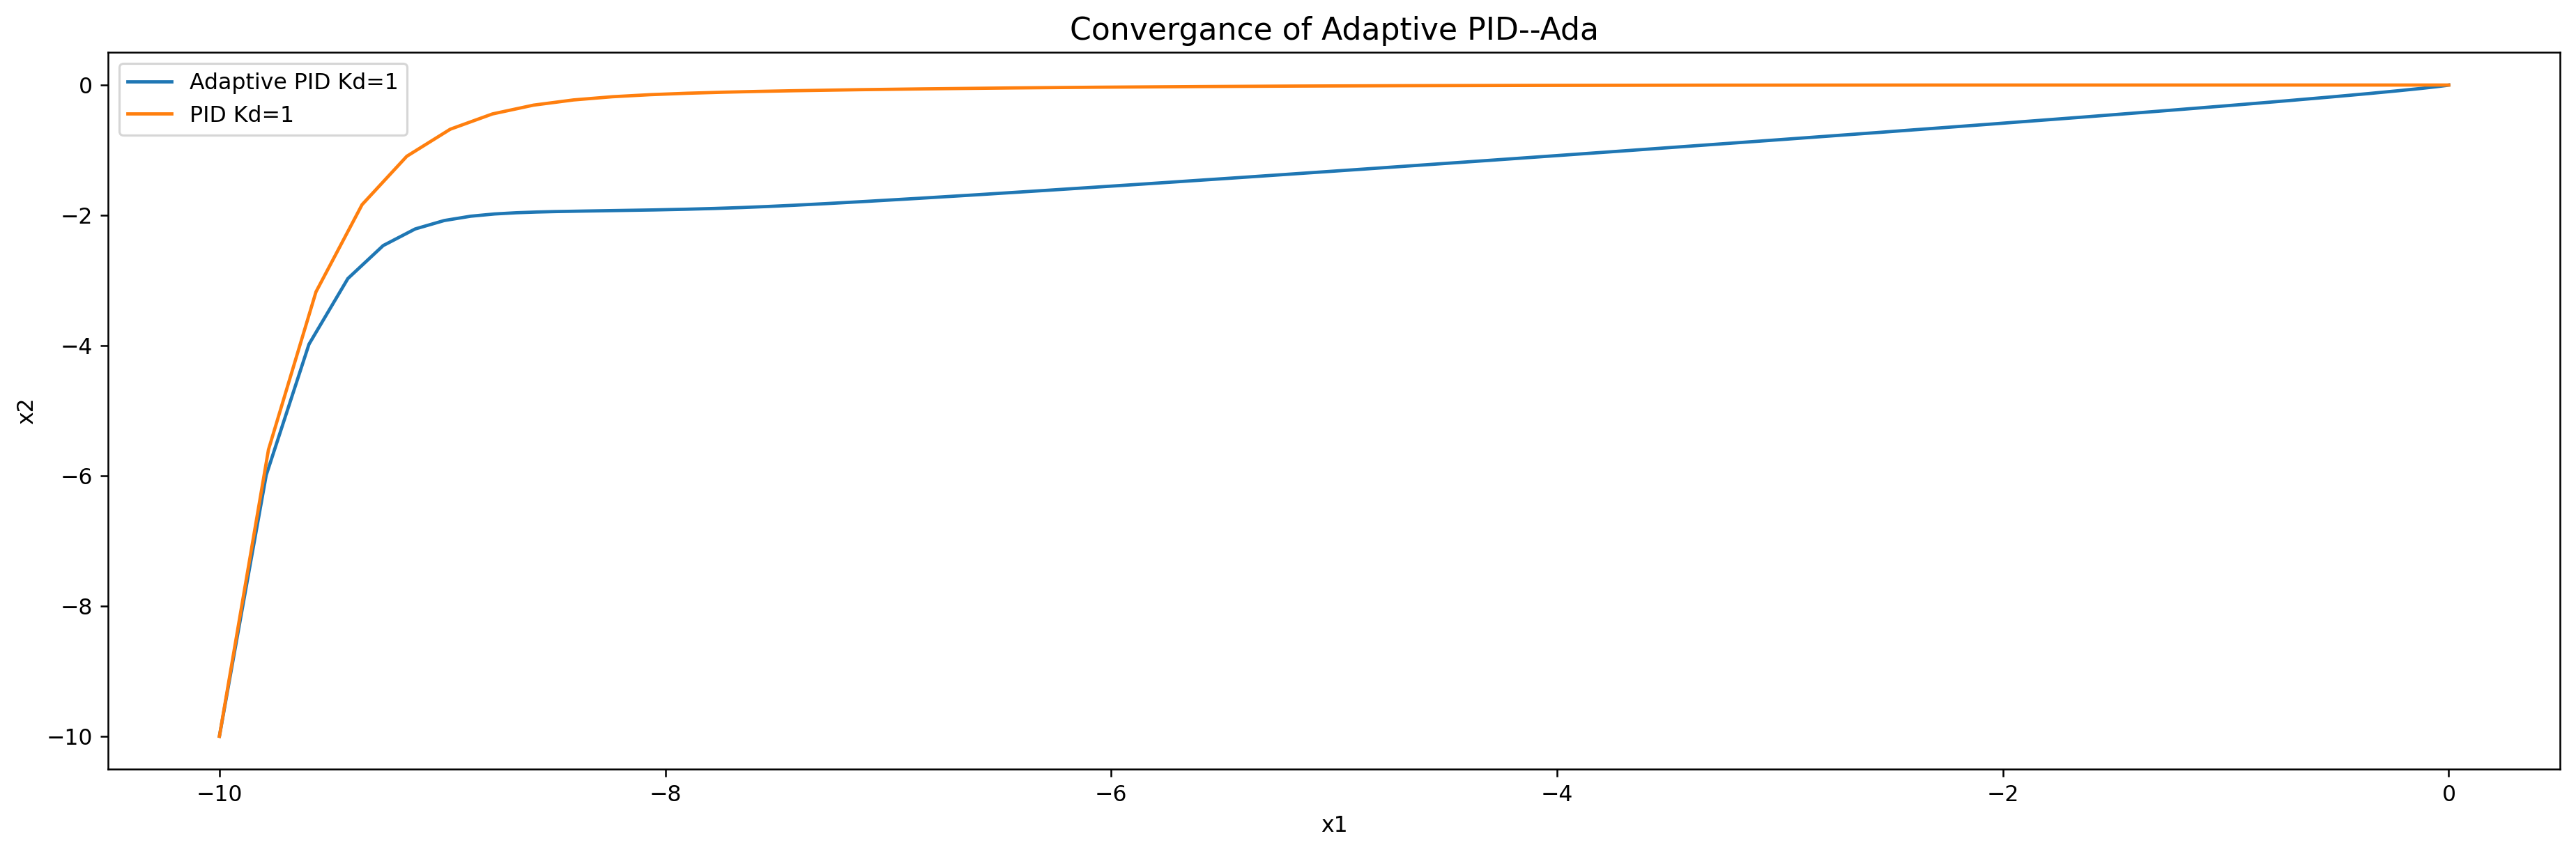

CPU times: user 4.33 s, sys: 16.9 ms, total: 4.35 s
Wall time: 4.36 s


In [14]:
%%time
x_val_4 = [l[0] for l in log_4]
y_val_4 = [l[1] for l in log_4]

x_val = [l[0] for l in log4]
y_val = [l[1] for l in log4]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adaptive PID--Ada', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_4,y_val_4, label='Adaptive PID Kd=1')
plt.plot(x_val,y_val, label='PID Kd=1')
plt.legend()

plt.show()

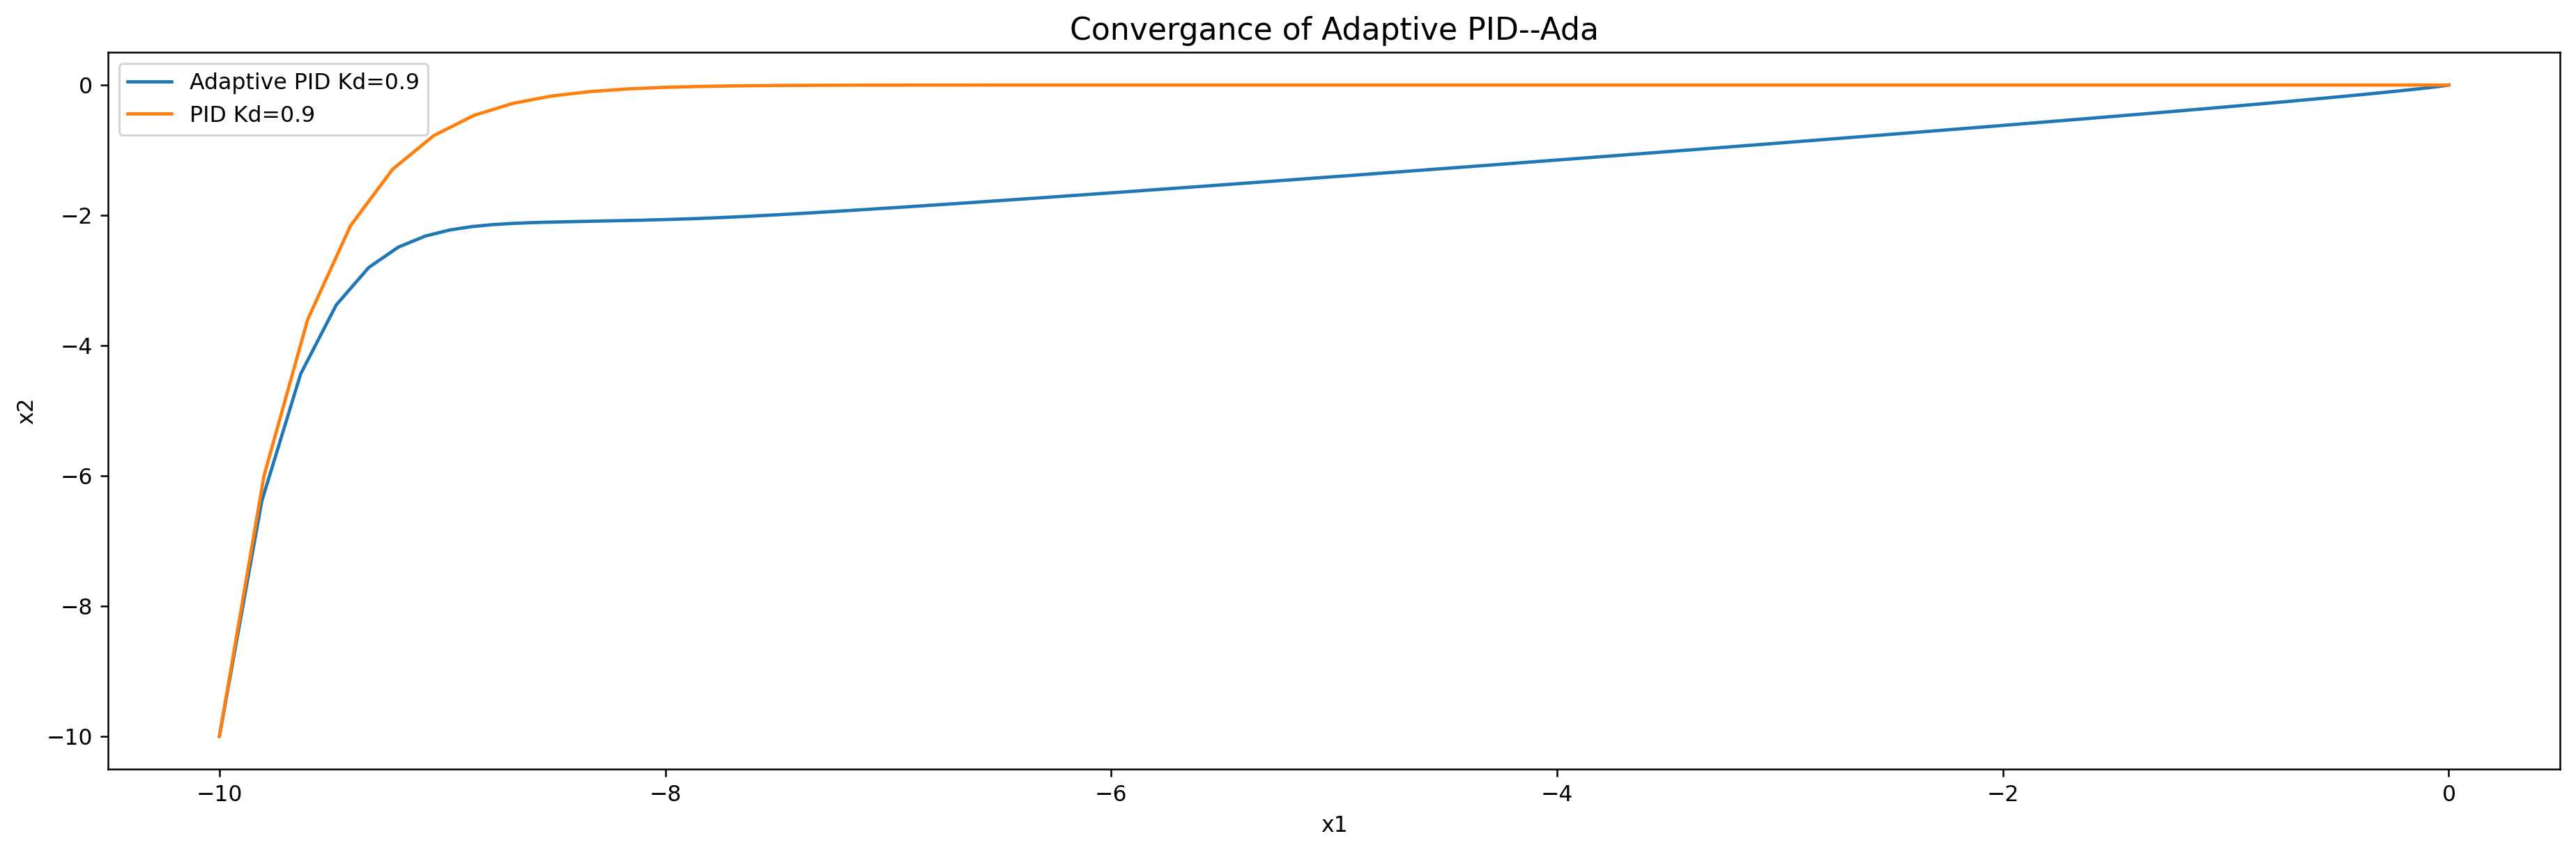

CPU times: user 3.39 s, sys: 17.1 ms, total: 3.41 s
Wall time: 3.43 s


In [15]:
%%time
x_val_5 = [l[0] for l in log_5]
y_val_5 = [l[1] for l in log_5]

x_val = [l[0] for l in log5]
y_val = [l[1] for l in log5]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adaptive PID--Ada', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_5,y_val_5, label='Adaptive PID Kd=0.9')
plt.plot(x_val,y_val, label='PID Kd=0.9')
plt.legend()

plt.show()

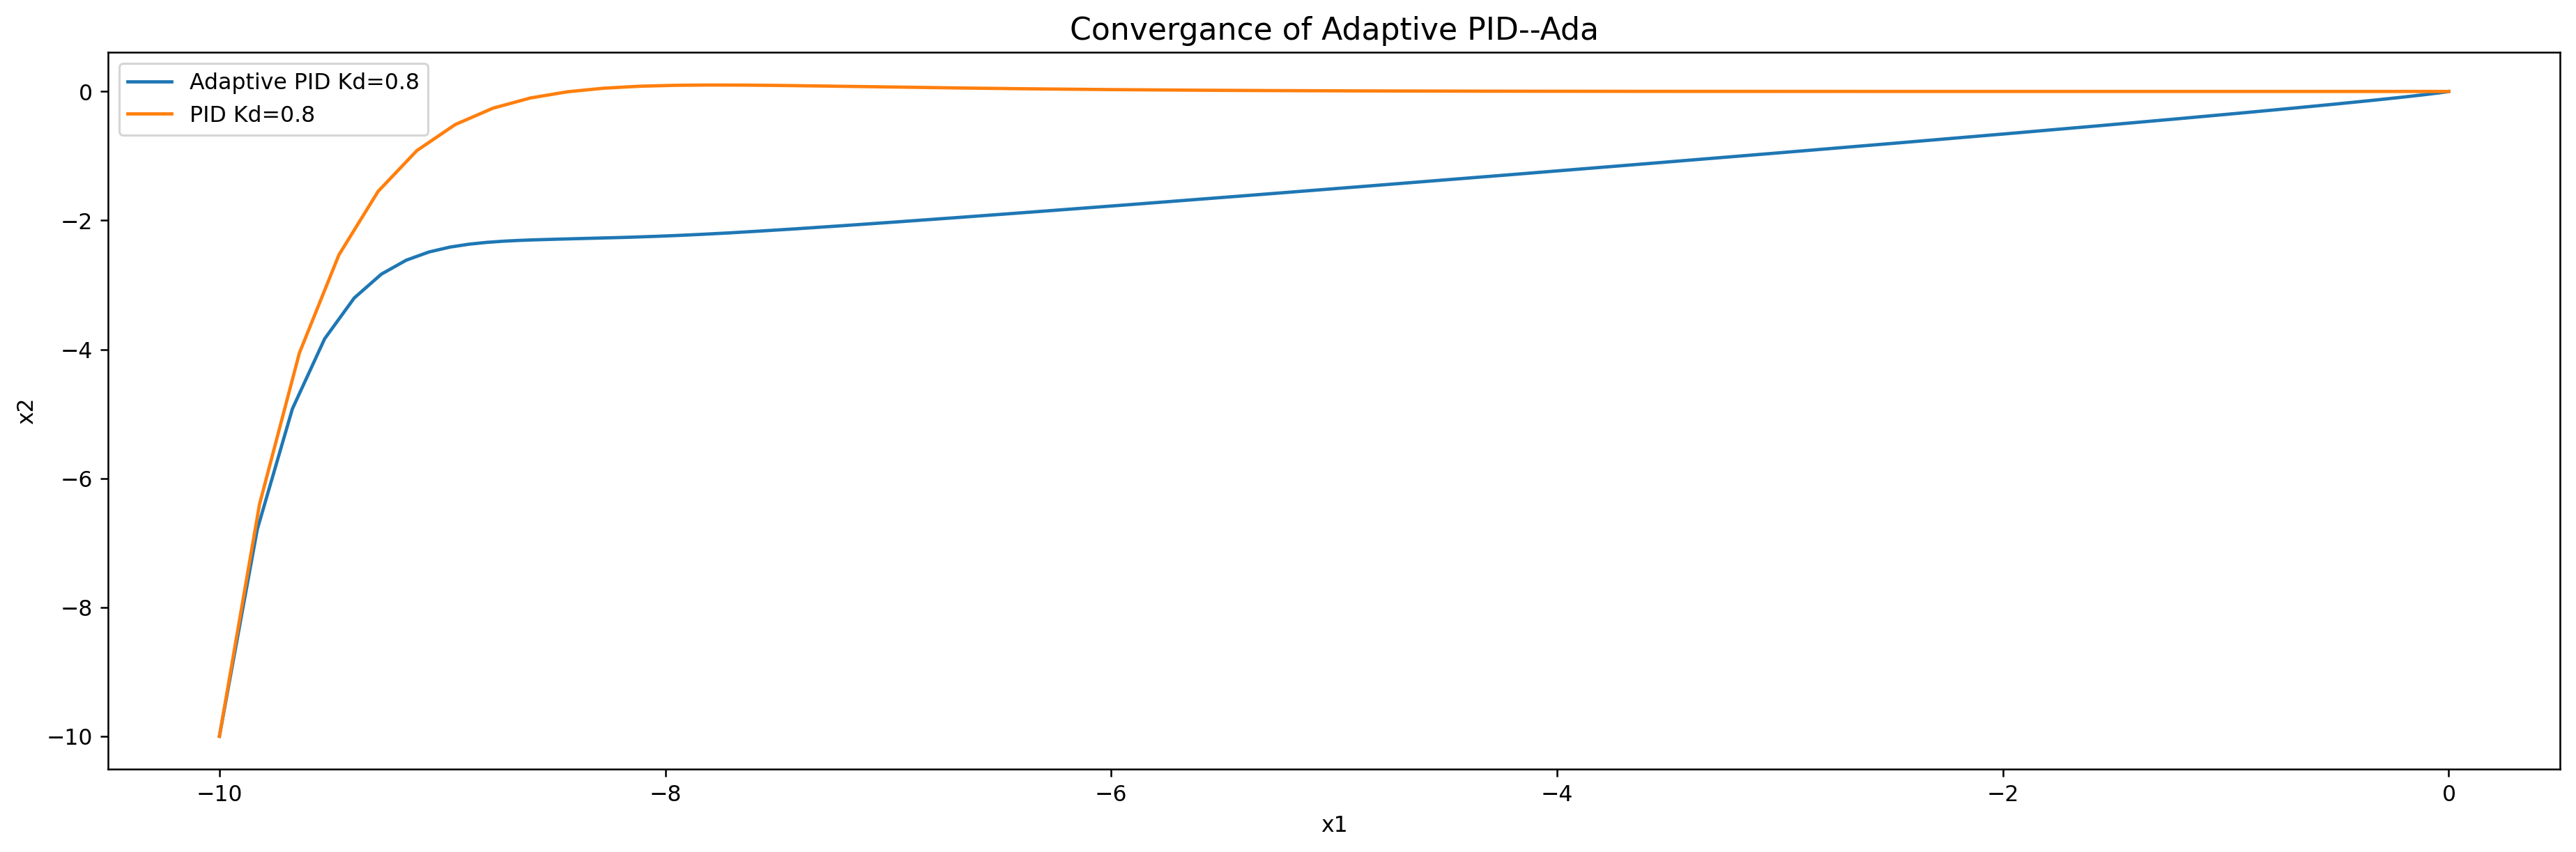

CPU times: user 54.1 s, sys: 923 ms, total: 55 s
Wall time: 55.2 s


In [16]:
%%time
x_val_6 = [l[0] for l in log_6]
y_val_6 = [l[1] for l in log_6]

x_val = [l[0] for l in log6]
y_val = [l[1] for l in log6]

plt.figure(figsize=(20,6))
plt.rcParams['figure.dpi'] = 227

plt.title('Convergance of Adaptive PID--Ada', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val_6,y_val_6, label='Adaptive PID Kd=0.8')
plt.plot(x_val,y_val, label='PID Kd=0.8')
plt.legend()

plt.show()

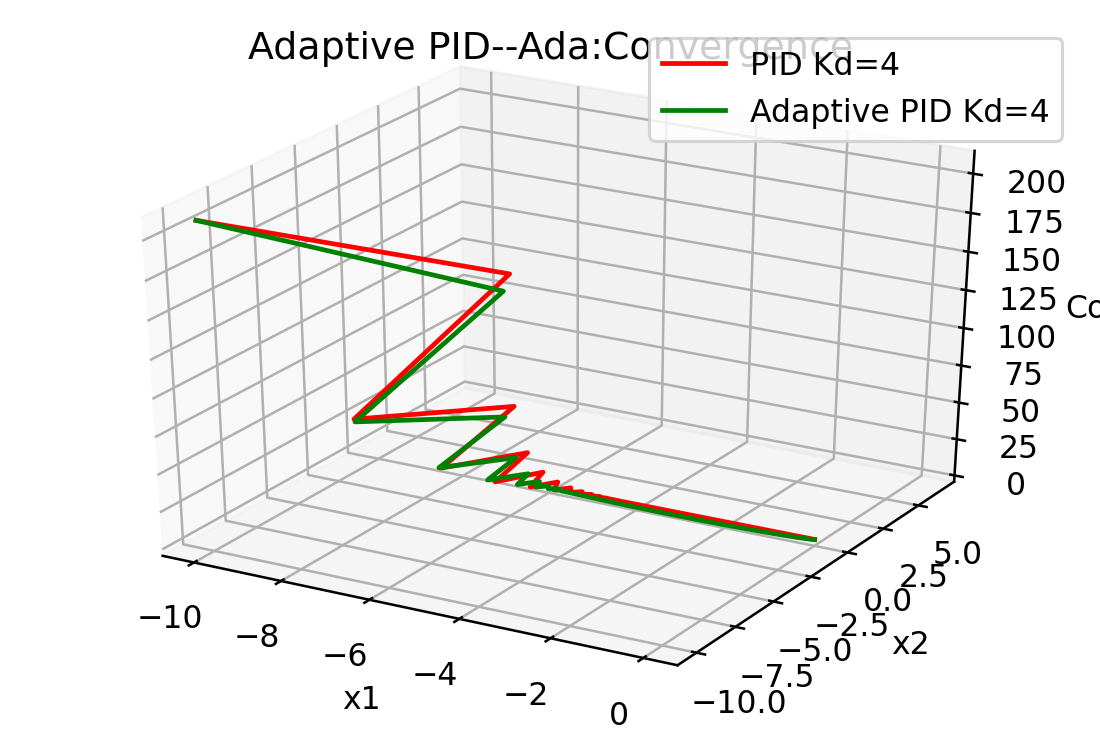

CPU times: user 6.27 s, sys: 816 ms, total: 7.09 s
Wall time: 6.29 s


In [19]:
%%time
x_val_1 = [l[0] for l in log_1]
y_val_1 = [l[1] for l in log_1]
costs_1 = np.array([func(x_val_1, y_val_1) for x_val_1, y_val_1 in zip(x_val_1, y_val_1)])

x_val = [l[0] for l in log1]
y_val = [l[1] for l in log1]

costs1 = np.array([func(x_val, y_val) for x_val, y_val in zip(x_val, y_val)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x_val, y_val, costs, linewidth=0.1, antialiased=True,cmap='viridis', edgecolor='none')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('Adaptive PID--Ada:Convergence')
ax.plot(x_val, y_val,costs, color='red', label='PID Kd=4')
ax.plot(x_val_1, y_val_1,costs_1, color='green', label = 'Adaptive PID Kd=4')

plt.legend()
plt.show()

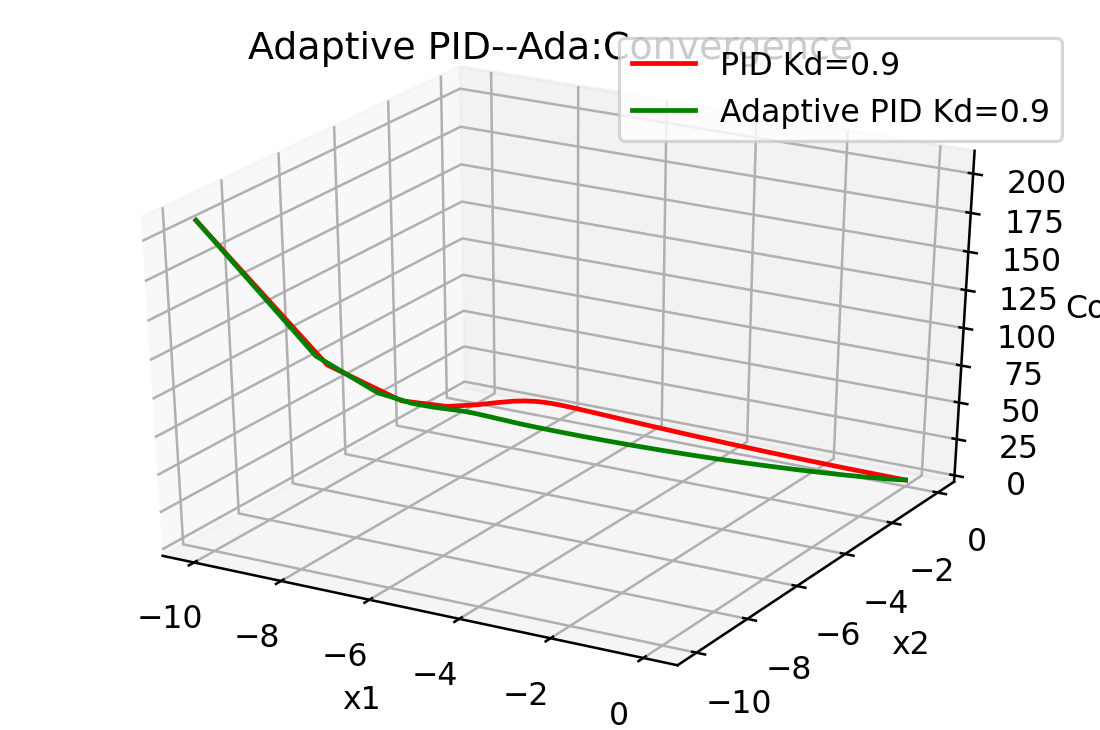

CPU times: user 3.98 s, sys: 564 ms, total: 4.54 s
Wall time: 4 s


In [21]:
%%time
x_val_5 = [l[0] for l in log_5]
y_val_5 = [l[1] for l in log_5]
costs_5 = np.array([func(x_val_5, y_val_5) for x_val_5, y_val_5 in zip(x_val_5, y_val_5)])


x_val = [l[0] for l in log5]
y_val = [l[1] for l in log5]
costs5 = np.array([func(x_val, y_val) for x_val, y_val in zip(x_val, y_val)])


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_trisurf(x_val, y_val, costs, linewidth=0.1, antialiased=True,cmap='viridis', edgecolor='none')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Cost')

ax.set_title('Adaptive PID--Ada:Convergence')
ax.plot(x_val, y_val,costs5, color='red', label='PID Kd=0.9')
ax.plot(x_val_5, y_val_5,costs_5, color='green', label = 'Adaptive PID Kd=0.9')

plt.legend()
plt.show()
